In [308]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import random

In [309]:
file_path = "netcdf_files/southern-ocean-chla.nc"

# Open the NetCDF file
ds = xr.open_dataset(file_path)
ds

<xarray.Dataset> Size: 105MB
Dimensions:           (N_PROF: 47276, PRES_ADJUSTED: 81)
Coordinates:
  * N_PROF            (N_PROF) int32 189kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1900 1950 2000
    JULD              (N_PROF) datetime64[ns] 378kB ...
    LATITUDE          (N_PROF) float64 378kB ...
    LONGITUDE         (N_PROF) float64 378kB ...
Data variables:
    POSITION_QC       (N_PROF) |S1 47kB ...
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 31MB ...
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 4MB ...
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 31MB ...
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 4MB ...
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 31MB ...
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 4MB ...

In [310]:
ds['CHLA_ADJUSTED'].sel(N_PROF=1, method='nearest').values

array([       nan, 0.147548  , 0.14836862, 0.1472861 , 0.14739087,
       0.14749563, 0.14590677, 0.14667501, 0.14677977, 0.14426553,
       0.14611629, 0.15000986, 0.149294  , 0.13361495, 0.11972221,
       0.08868021, 0.070724  , 0.05445127, 0.03758674, 0.02892476,
       0.02014514, 0.01479962, 0.00879338, 0.00622676, 0.00432362,
       0.00355538, 0.00283951, 0.00268238, 0.00355538, 0.003503  ,
       0.00180938, 0.00345062, 0.003503  , 0.00355538, 0.00180938,
       0.00093638, 0.00252524, 0.00093638, 0.00180938, 0.00252524,
       0.00170462, 0.00191413, 0.00263   , 0.00421887, 0.00345062,
       0.001757  , 0.00339824, 0.00273476, 0.001757  , 0.00339824,
       0.00186176, 0.00432362, 0.00694262, 0.00442838, 0.00519662,
       0.005249  , 0.006122  , 0.00678549, 0.00359445, 0.00530138,
       0.00872776, 0.00699986, 0.00786765, 0.0104523 , 0.00703181,
       0.00787643, 0.00875451, 0.00960737, 0.00872102, 0.00613201,
       0.00699465, 0.00788135, 0.00960205, 0.00872406, 0.00786

In [311]:
ds.sel(N_PROF=1, method='nearest')

<xarray.Dataset> Size: 3kB
Dimensions:           (PRES_ADJUSTED: 81)
Coordinates:
    N_PROF            int32 4B 1
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1900 1950 2000
    JULD              datetime64[ns] 8B ...
    LATITUDE          float64 8B ...
    LONGITUDE         float64 8B ...
Data variables:
    POSITION_QC       |S1 1B ...
    TEMP_ADJUSTED     (PRES_ADJUSTED) float64 648B ...
    TEMP_ADJUSTED_QC  (PRES_ADJUSTED) |S1 81B ...
    PSAL_ADJUSTED     (PRES_ADJUSTED) float64 648B ...
    PSAL_ADJUSTED_QC  (PRES_ADJUSTED) |S1 81B ...
    CHLA_ADJUSTED     (PRES_ADJUSTED) float64 648B ...
    CHLA_ADJUSTED_QC  (PRES_ADJUSTED) |S1 81B ...

In [312]:
# dropping profiles based on QC flag

ds_dropped = ds.where(ds['CHLA_ADJUSTED_QC'] != b'', drop=True)
ds_dropped = ds_dropped.where(ds_dropped['CHLA_ADJUSTED_QC'] != b'3', drop=True)
ds_dropped = ds_dropped.where(ds_dropped['CHLA_ADJUSTED_QC'] != b'4', drop=True)
ds_dropped = ds_dropped.dropna(dim='N_PROF', how='all', subset=['CHLA_ADJUSTED'])
ds_dropped

<xarray.Dataset> Size: 169MB
Dimensions:           (N_PROF: 36984, PRES_ADJUSTED: 81)
Coordinates:
  * N_PROF            (N_PROF) int32 148kB 0 1 2 3 4 ... 49488 49493 49494 49519
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1900 1950 2000
    JULD              (N_PROF) datetime64[ns] 296kB 2024-06-08T15:24:28.00164...
    LATITUDE          (N_PROF) float64 296kB -30.19 -30.48 ... -57.22 -64.43
    LONGITUDE         (N_PROF) float64 296kB -0.7675 -0.9496 ... 69.05 73.63
Data variables:
    POSITION_QC       (N_PROF, PRES_ADJUSTED) object 24MB b'1' b'1' ... nan b'1'
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 24MB nan 19.89 ... nan nan
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 24MB b'1' b'1' ... nan b'1'
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 24MB nan 35.94 ... nan nan
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 24MB b'1' b'1' ... nan b'1'
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 24MB nan 0.2017 ... nan
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 24MB b'5' b'5' ... nan b'2'

In [313]:
ds_dropped['CHLA_ADJUSTED'].sel(N_PROF=49519, method='nearest').values

array([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan, 0.0432,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan])

In [314]:
chla = ds_dropped['CHLA_ADJUSTED']
chla

<xarray.DataArray 'CHLA_ADJUSTED' (N_PROF: 36984, PRES_ADJUSTED: 81)> Size: 24MB
array([[       nan, 0.201674  , 0.20103235, ..., 0.00443917, 0.007868  ,
        0.007868  ],
       [       nan, 0.147548  , 0.14836862, ..., 0.01048843, 0.01123856,
               nan],
       [       nan, 0.21389601, 0.219134  , ..., 0.00524257, 0.00450096,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.0216    ,        nan,
               nan],
       [       nan, 0.1296    ,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * N_PROF         (N_PROF) int32 148kB 0 1 2 3 4 ... 49488 49493 49494 49519
  * PRES_ADJUSTED  (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1850 1900 1950 2000
    JULD           (N_PROF) datetime64[ns] 296kB 2024-06-08T15:24:28.00164403...
    LATITUDE       (N_PROF) float64 296kB -30.19 -30.48 -30.7 ... -57.22 -64.43
    LONGITUDE      (N_PROF) float64 296kB -0.7675 -0.9496 ... 69.05 73.63
Attributes:
    long_name:       Chlorophyll-A
    standard_name:   mass_concentration_of_chlorophyll_a_in_sea_water
    units:           mg/m3
    C_format:        %.4f
    FORTRAN_format:  F.4
    resolution:      0.025

In [315]:
limit = 100

ds_interpolated = ds_dropped
ds_interpolated['CHLA_ADJUSTED'] = ds_dropped['CHLA_ADJUSTED'].interpolate_na(dim='PRES_ADJUSTED', method='linear')
ds_interpolated['CHLA_ADJUSTED'] = ds_interpolated['CHLA_ADJUSTED'].bfill(dim='PRES_ADJUSTED', limit=limit)
ds_interpolated['CHLA_ADJUSTED'] = ds_interpolated['CHLA_ADJUSTED'].ffill(dim='PRES_ADJUSTED', limit=limit)
ds_interpolated

<xarray.Dataset> Size: 169MB
Dimensions:           (N_PROF: 36984, PRES_ADJUSTED: 81)
Coordinates:
  * N_PROF            (N_PROF) int32 148kB 0 1 2 3 4 ... 49488 49493 49494 49519
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1900 1950 2000
    JULD              (N_PROF) datetime64[ns] 296kB 2024-06-08T15:24:28.00164...
    LATITUDE          (N_PROF) float64 296kB -30.19 -30.48 ... -57.22 -64.43
    LONGITUDE         (N_PROF) float64 296kB -0.7675 -0.9496 ... 69.05 73.63
Data variables:
    POSITION_QC       (N_PROF, PRES_ADJUSTED) object 24MB b'1' b'1' ... nan b'1'
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 24MB nan 19.89 ... nan nan
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 24MB b'1' b'1' ... nan b'1'
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 24MB nan 35.94 ... nan nan
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 24MB b'1' b'1' ... nan b'1'
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 24MB 0.2017 ... 0.0432
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 24MB b'5' b'5' ... nan b'2'

In [316]:
ds_dropped.sel(N_PROF=13698, method='nearest')

<xarray.Dataset> Size: 5kB
Dimensions:           (PRES_ADJUSTED: 81)
Coordinates:
    N_PROF            int32 4B 13698
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1900 1950 2000
    JULD              datetime64[ns] 8B 2019-12-19T01:59:23.000193024
    LATITUDE          float64 8B -31.17
    LONGITUDE         float64 8B -133.8
Data variables:
    POSITION_QC       (PRES_ADJUSTED) object 648B nan nan nan ... b'1' b'1' b'1'
    TEMP_ADJUSTED     (PRES_ADJUSTED) float64 648B nan nan nan ... nan nan nan
    TEMP_ADJUSTED_QC  (PRES_ADJUSTED) object 648B nan nan nan ... b'1' b'1' b'1'
    PSAL_ADJUSTED     (PRES_ADJUSTED) float64 648B nan nan nan ... nan nan nan
    PSAL_ADJUSTED_QC  (PRES_ADJUSTED) object 648B nan nan nan ... b'1' b'1' b'1'
    CHLA_ADJUSTED     (PRES_ADJUSTED) float64 648B 0.0036 0.0036 ... 0.005359
    CHLA_ADJUSTED_QC  (PRES_ADJUSTED) object 648B nan nan nan ... b'1' b'1' b'1'

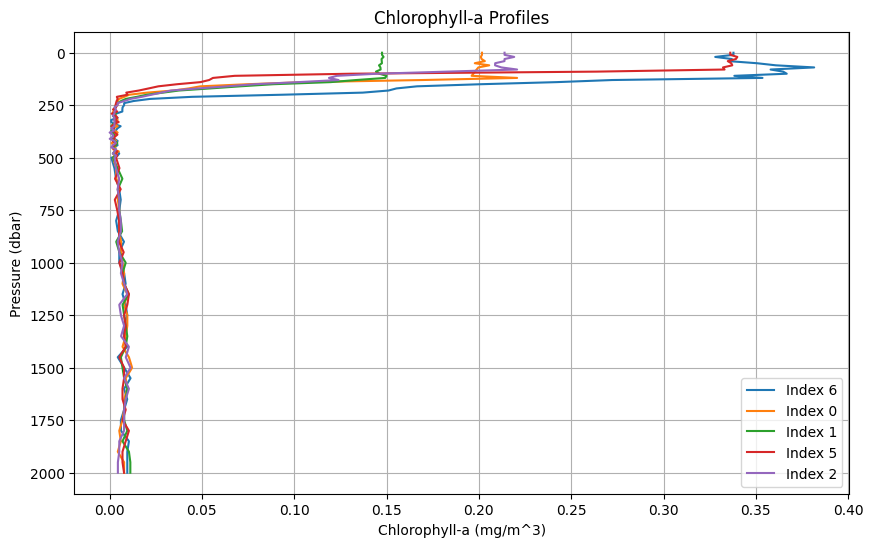

In [317]:
# visualising 5 random profiles of CHLA_ADJUSTED
plt.figure(figsize=(10, 6))

chla_plotting = ds_interpolated['CHLA_ADJUSTED']

for i in random.sample(range(len(ds_interpolated)), 5):
    plt.plot(chla_plotting[i, :], ds_interpolated['PRES_ADJUSTED'], label=f"Index {i}")

plt.gca().invert_yaxis()  # Invert the y-axis (pressure increases downward)
plt.xlabel('Chlorophyll-a (mg/m^3)')
plt.ylabel('Pressure (dbar)')
plt.title('Chlorophyll-a Profiles')
plt.legend()
plt.grid()
plt.show()

In [318]:
ds_dropped.sel(N_PROF=35708, method='nearest')

<xarray.Dataset> Size: 5kB
Dimensions:           (PRES_ADJUSTED: 81)
Coordinates:
    N_PROF            int32 4B 35708
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1900 1950 2000
    JULD              datetime64[ns] 8B 2015-01-24T09:04:00.000000256
    LATITUDE          float64 8B -50.6
    LONGITUDE         float64 8B 72.14
Data variables:
    POSITION_QC       (PRES_ADJUSTED) object 648B nan nan nan ... nan nan nan
    TEMP_ADJUSTED     (PRES_ADJUSTED) float64 648B nan nan nan ... nan nan nan
    TEMP_ADJUSTED_QC  (PRES_ADJUSTED) object 648B nan nan nan ... nan nan nan
    PSAL_ADJUSTED     (PRES_ADJUSTED) float64 648B nan nan nan ... nan nan nan
    PSAL_ADJUSTED_QC  (PRES_ADJUSTED) object 648B nan nan nan ... nan nan nan
    CHLA_ADJUSTED     (PRES_ADJUSTED) float64 648B 0.04871 0.04871 ... 0.0288
    CHLA_ADJUSTED_QC  (PRES_ADJUSTED) object 648B nan nan nan ... nan nan nan

In [328]:
chla = ds_interpolated['CHLA_ADJUSTED']
chla

<xarray.DataArray 'CHLA_ADJUSTED' (N_PROF: 36984, PRES_ADJUSTED: 81)> Size: 24MB
array([[0.201674  , 0.201674  , 0.20103235, ..., 0.00443917, 0.007868  ,
        0.007868  ],
       [0.147548  , 0.147548  , 0.14836862, ..., 0.01048843, 0.01123856,
        0.01123856],
       [0.21389601, 0.21389601, 0.219134  , ..., 0.00524257, 0.00450096,
        0.00450096],
       ...,
       [0.0216    , 0.0216    , 0.0216    , ..., 0.0216    , 0.0216    ,
        0.0216    ],
       [0.1296    , 0.1296    , 0.1296    , ..., 0.1296    , 0.1296    ,
        0.1296    ],
       [0.0432    , 0.0432    , 0.0432    , ..., 0.0432    , 0.0432    ,
        0.0432    ]])
Coordinates:
  * N_PROF         (N_PROF) int32 148kB 0 1 2 3 4 ... 49488 49493 49494 49519
  * PRES_ADJUSTED  (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1850 1900 1950 2000
    JULD           (N_PROF) datetime64[ns] 296kB 2024-06-08T15:24:28.00164403...
    LATITUDE       (N_PROF) float64 296kB -30.19 -30.48 -30.7 ... -57.22 -64.43
    LONGITUDE      (N_PROF) float64 296kB -0.7675 -0.9496 ... 69.05 73.63
Attributes:
    long_name:       Chlorophyll-A
    standard_name:   mass_concentration_of_chlorophyll_a_in_sea_water
    units:           mg/m3
    C_format:        %.4f
    FORTRAN_format:  F.4
    resolution:      0.025

In [320]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [321]:
chla_dropped = chla.dropna(dim='N_PROF')
chla_dropped

<xarray.DataArray 'CHLA_ADJUSTED' (N_PROF: 36984, PRES_ADJUSTED: 81)> Size: 24MB
array([[0.201674  , 0.201674  , 0.20103235, ..., 0.00443917, 0.007868  ,
        0.007868  ],
       [0.147548  , 0.147548  , 0.14836862, ..., 0.01048843, 0.01123856,
        0.01123856],
       [0.21389601, 0.21389601, 0.219134  , ..., 0.00524257, 0.00450096,
        0.00450096],
       ...,
       [0.0216    , 0.0216    , 0.0216    , ..., 0.0216    , 0.0216    ,
        0.0216    ],
       [0.1296    , 0.1296    , 0.1296    , ..., 0.1296    , 0.1296    ,
        0.1296    ],
       [0.0432    , 0.0432    , 0.0432    , ..., 0.0432    , 0.0432    ,
        0.0432    ]])
Coordinates:
  * N_PROF         (N_PROF) int32 148kB 0 1 2 3 4 ... 49488 49493 49494 49519
  * PRES_ADJUSTED  (PRES_ADJUSTED) int32 324B 0 10 20 30 ... 1850 1900 1950 2000
    JULD           (N_PROF) datetime64[ns] 296kB 2024-06-08T15:24:28.00164403...
    LATITUDE       (N_PROF) float64 296kB -30.19 -30.48 -30.7 ... -57.22 -64.43
    LONGITUDE      (N_PROF) float64 296kB -0.7675 -0.9496 ... 69.05 73.63
Attributes:
    long_name:       Chlorophyll-A
    standard_name:   mass_concentration_of_chlorophyll_a_in_sea_water
    units:           mg/m3
    C_format:        %.4f
    FORTRAN_format:  F.4
    resolution:      0.025

In [329]:
chla_cleaned_array = chla_dropped.values
profiles, pressure_levels = chla_cleaned_array.shape

chla_cleaned_array

array([[0.201674  , 0.201674  , 0.20103235, ..., 0.00443917, 0.007868  ,
        0.007868  ],
       [0.147548  , 0.147548  , 0.14836862, ..., 0.01048843, 0.01123856,
        0.01123856],
       [0.21389601, 0.21389601, 0.219134  , ..., 0.00524257, 0.00450096,
        0.00450096],
       ...,
       [0.0216    , 0.0216    , 0.0216    , ..., 0.0216    , 0.0216    ,
        0.0216    ],
       [0.1296    , 0.1296    , 0.1296    , ..., 0.1296    , 0.1296    ,
        0.1296    ],
       [0.0432    , 0.0432    , 0.0432    , ..., 0.0432    , 0.0432    ,
        0.0432    ]])

In [323]:
scaler = StandardScaler()
chla_scaled = scaler.fit_transform(chla_cleaned_array)

chla_scaled

array([[-5.92793299e-03, -5.98360730e-03, -1.13867868e-02, ...,
        -1.00306000e-01, -4.88874545e-02, -4.88180825e-02],
       [-1.34772477e-01, -1.34833529e-01, -1.36623735e-01, ...,
        -1.01508782e-02,  1.35339139e-03,  1.42136604e-03],
       [ 2.31660157e-02,  2.31115557e-02,  3.16598478e-02, ...,
        -8.83324662e-02, -9.90758612e-02, -9.90050933e-02],
       ...,
       [-4.34586149e-01, -4.34659714e-01, -4.38085813e-01, ...,
         1.55450436e-01,  1.55798615e-01,  1.55862294e-01],
       [-1.77496903e-01, -1.77559738e-01, -1.81256447e-01, ...,
         1.76502839e+00,  1.76562207e+00,  1.76564097e+00],
       [-3.83168300e-01, -3.83239719e-01, -3.86719940e-01, ...,
         4.77366028e-01,  4.77763306e-01,  4.77818030e-01]])

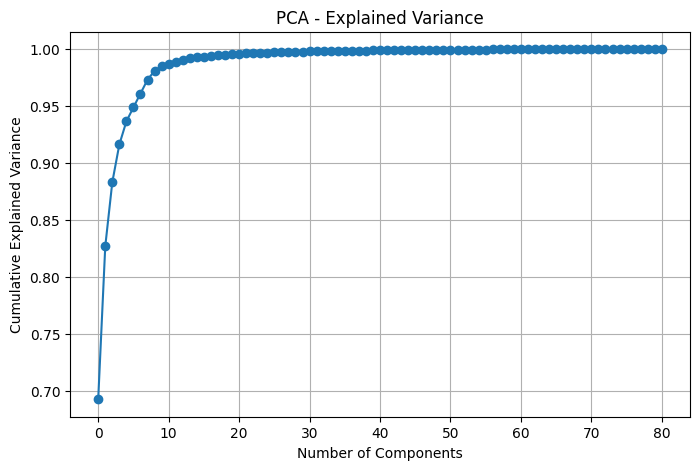

In [324]:
pca = PCA()
chla_pca = pca.fit_transform(chla_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

In [325]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

# Reduce data using the selected components
pca = PCA(n_components=n_components)
chla_reduced = pca.fit_transform(chla_scaled)

chla_reduced

array([[-5.12868190e-01,  6.82076612e-01, -2.71612775e-01, ...,
         8.83571735e-01, -7.38494470e-03, -5.98464851e-02],
       [-5.92970900e-01,  1.09743730e-01, -1.06724997e-01, ...,
         7.45770344e-01, -5.71707451e-03, -2.56465835e-02],
       [-6.12781728e-01,  4.64614473e-01, -2.66190199e-01, ...,
         4.21917853e-01, -6.66016093e-03, -1.50971917e-02],
       ...,
       [ 5.58662016e-01, -1.84836884e+00,  1.28701138e-01, ...,
        -1.06374660e-01, -6.65105865e-03,  4.22938905e-03],
       [ 1.18327839e+01, -2.87153452e+00, -8.74819400e-01, ...,
        -3.78701178e-02, -1.01175740e-02,  4.66088282e-03],
       [ 2.81348640e+00, -2.05300198e+00, -7.20029699e-02, ...,
        -9.26737514e-02, -7.34436172e-03,  4.31568780e-03]])

In [326]:
# Perform GMM clustering
n_clusters = 5  # Adjust as needed
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
labels = gmm.fit_predict(chla_reduced)


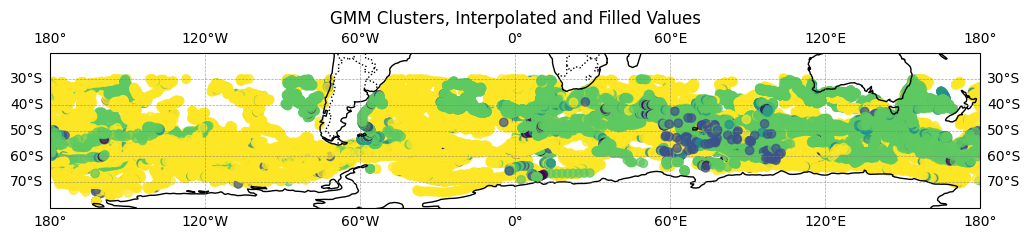

In [330]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Plot the geographic scatter map with Cartopy
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -20, -80], crs=ccrs.PlateCarree())

# Add scatter points for the clusters
scatter = plt.scatter(
    chla['LONGITUDE'],
    chla['LATITUDE'],
    c=labels,
    cmap='viridis',
    alpha=0.7,
    transform=ccrs.PlateCarree()
)

# Add features to the map
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

# Add labels and title
plt.title("GMM Clusters, Interpolated and Filled Values", fontsize=12)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Show the plot
plt.show()

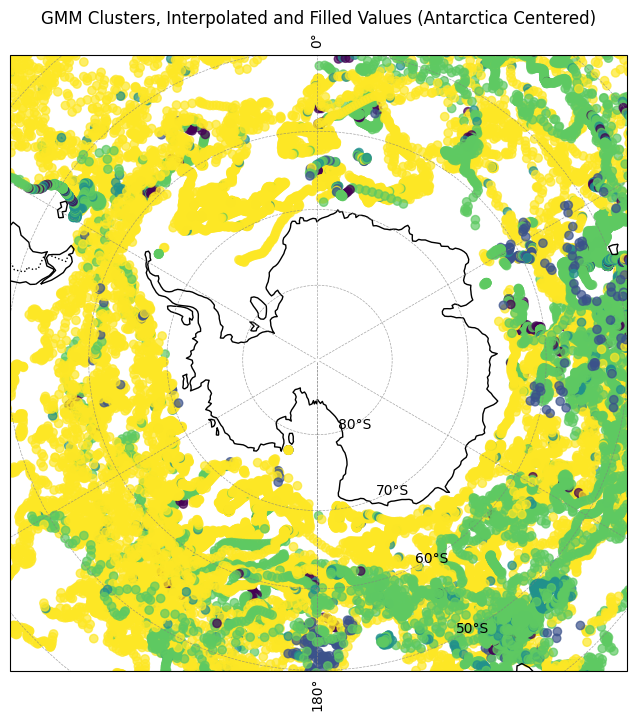

In [331]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Plot the geographic scatter map with Cartopy
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())  # Define extent for better visualization

# Add scatter points for the clusters
scatter = plt.scatter(
    chla['LONGITUDE'],
    chla['LATITUDE'],
    c=labels,
    cmap='viridis',
    alpha=0.7,
    transform=ccrs.PlateCarree()
)

# Add features to the map
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

# Add labels and title
plt.title("GMM Clusters, Interpolated and Filled Values (Antarctica Centered)", fontsize=12)

# Show the plot
plt.show()
